In [2]:
import pandas as pd
import numpy as np
import os


In [3]:
df = pd.read_pickle('../../data/interim/df_filtered_binary.pkl')

In [4]:
df

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,azimuth,pitch,roll,label,subject_id,fall_label
0,0.120127,-2.217653,-0.298938,-0.006791,0.033568,-0.003344,-0.982106,1.466176,1.076405,STD,1,ADL
1,0.128787,-2.215478,-0.330573,-0.012438,0.028701,0.005826,-1.011898,1.529641,0.967330,STD,1,ADL
2,0.125399,-2.210226,-0.371455,-0.010902,0.023067,0.004100,-1.034774,1.586706,0.860239,STD,1,ADL
3,0.117923,-2.207260,-0.396612,-0.009458,0.018697,0.000048,-1.052174,1.638619,0.758519,STD,1,ADL
4,0.118343,-2.208842,-0.387711,-0.012425,0.017044,0.003507,-1.064748,1.686520,0.659668,STD,1,ADL
...,...,...,...,...,...,...,...,...,...,...,...,...
109057760,0.450731,0.535045,-0.324386,-0.031796,-0.059572,-0.027028,-0.127635,-0.706084,0.517298,STD,67,ADL
109057761,0.481948,0.536976,-0.334319,-0.016996,-0.046264,-0.028323,-0.126733,-0.705844,0.516299,STD,67,ADL
109057762,0.502064,0.539007,-0.333029,0.000452,-0.029247,-0.023712,-0.126094,-0.706144,0.516886,STD,67,ADL
109057763,0.498980,0.536931,-0.329682,0.008017,-0.019459,-0.027067,-0.125563,-0.706848,0.518772,STD,67,ADL


In [5]:
from sklearn.model_selection import GroupShuffleSplit

# Get your subject group array
groups = df['subject_id'].values

# 1. Split off test subjects
gss1 = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
trainval_idx, test_idx = next(gss1.split(df, df['label'], groups=groups))

trainval_subjects = df.iloc[trainval_idx]['subject_id'].unique()
test_subjects = df.iloc[test_idx]['subject_id'].unique()

df_trainval = df[df['subject_id'].isin(trainval_subjects)].copy()
df_test     = df[df['subject_id'].isin(test_subjects)].copy()

# 2. Split val subjects from trainval
groups_trainval = df_trainval['subject_id'].values
gss2 = GroupShuffleSplit(n_splits=1, test_size=0.125, random_state=42)
train_idx, val_idx = next(gss2.split(df_trainval, df_trainval['label'], groups=groups_trainval))

train_subjects = df_trainval.iloc[train_idx]['subject_id'].unique()
val_subjects   = df_trainval.iloc[val_idx]['subject_id'].unique()

df_train = df_trainval[df_trainval['subject_id'].isin(train_subjects)].copy()
df_val   = df_trainval[df_trainval['subject_id'].isin(val_subjects)].copy()

print("Train subjects:", set(train_subjects))
print("Val subjects:", set(val_subjects))
print("Test subjects:", set(test_subjects))


Train subjects: {np.int16(2), np.int16(3), np.int16(4), np.int16(7), np.int16(8), np.int16(11), np.int16(12), np.int16(14), np.int16(15), np.int16(16), np.int16(18), np.int16(20), np.int16(21), np.int16(22), np.int16(23), np.int16(25), np.int16(28), np.int16(30), np.int16(31), np.int16(32), np.int16(33), np.int16(34), np.int16(35), np.int16(36), np.int16(38), np.int16(39), np.int16(40), np.int16(42), np.int16(43), np.int16(44), np.int16(45), np.int16(47), np.int16(48), np.int16(49), np.int16(50), np.int16(51), np.int16(52), np.int16(54), np.int16(56), np.int16(57), np.int16(58), np.int16(61), np.int16(63), np.int16(64), np.int16(66), np.int16(67)}
Val subjects: {np.int16(9), np.int16(59), np.int16(19), np.int16(53), np.int16(55), np.int16(24), np.int16(27)}
Test subjects: {np.int16(1), np.int16(65), np.int16(5), np.int16(6), np.int16(37), np.int16(41), np.int16(10), np.int16(13), np.int16(46), np.int16(17), np.int16(26), np.int16(60), np.int16(29), np.int16(62)}


In [6]:
sensor_cols = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z', 'azimuth','pitch','roll']

In [7]:
X_train_binary = df_train[sensor_cols]
X_val_binary = df_val[sensor_cols]
X_test_binary = df_test[sensor_cols]

y_train_binary = df_train['fall_label']
y_val_binary = df_val['fall_label']
y_test_binary = df_test['fall_label']

In [9]:
X_train_binary

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,azimuth,pitch,roll
634004,-0.458843,-0.004343,-0.272226,0.032586,-0.057479,0.017799,0.151812,-0.795093,-1.048645
634005,-0.881271,0.789259,-0.322166,0.031217,-0.012802,-0.002940,0.136114,-0.778771,-0.997640
634006,-0.750800,0.547177,-0.330515,0.042022,0.011359,-0.011404,0.121327,-0.765772,-0.956557
634007,-0.640295,0.394234,-0.315634,0.030857,0.012073,-0.015476,0.108499,-0.754728,-0.921267
634008,-0.686538,0.550332,-0.359439,0.009593,0.003928,-0.010498,0.098456,-0.744377,-0.889684
...,...,...,...,...,...,...,...,...,...
109057760,0.450731,0.535045,-0.324386,-0.031796,-0.059572,-0.027028,-0.127635,-0.706084,0.517298
109057761,0.481948,0.536976,-0.334319,-0.016996,-0.046264,-0.028323,-0.126733,-0.705844,0.516299
109057762,0.502064,0.539007,-0.333029,0.000452,-0.029247,-0.023712,-0.126094,-0.706144,0.516886
109057763,0.498980,0.536931,-0.329682,0.008017,-0.019459,-0.027067,-0.125563,-0.706848,0.518772


In [8]:
y_train_binary

634004       ADL
634005       ADL
634006       ADL
634007       ADL
634008       ADL
            ... 
109057760    ADL
109057761    ADL
109057762    ADL
109057763    ADL
109057764    ADL
Name: fall_label, Length: 2781516, dtype: object

### Segment into Windows

In [10]:
sensor_cols = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z', 'azimuth','pitch','roll']

def create_windows(X, y, window_size=125, step_size=62): # 2.5 sec with 50% overlapping window
    X_windows, y_windows = [], []
    
    for start in range(0, len(X) - window_size + 1, step_size):
        end = start + window_size
        window_data = X[start:end]
        window_labels = y[start:end]

        # Majority voting for label assignment
        unique, counts = np.unique(window_labels, return_counts=True)
        label = unique[np.argmax(counts)]

        X_windows.append(window_data)
        y_windows.append(label)

    return np.array(X_windows), np.array(y_windows)

In [11]:
X_train_windows, y_train_windows = create_windows(X_train_binary, y_train_binary)
X_val_windows, y_val_windows = create_windows(X_val_binary, y_val_binary)
X_test_windows, y_test_windows = create_windows(X_test_binary, y_test_binary)

In [12]:
X_train_windows.shape

(44862, 125, 9)

### Encode Label

In [13]:
label_map = {'ADL': 0, 'FALL': 1}
y_train_windows_encoded = np.vectorize(label_map.get)(y_train_windows)
y_val_windows_encoded = np.vectorize(label_map.get)(y_val_windows)
y_test_windows_encoded = np.vectorize(label_map.get)(y_test_windows)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D,GlobalAveragePooling1D, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall, AUC


input_shape = (X_train_windows.shape[1], X_train_windows.shape[2])  

model = Sequential([
    Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=input_shape),
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary output
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

model.summary()

c:\Users\sovan\Desktop\Fall Detection\fresh-ilab-fall-detection\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 121, 64)        │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 117, 64)        │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 113, 64)        │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 109, 64)        │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6976)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6976)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       893,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 974,273 (3.72 MB)

 Trainable params: 974,273 (3.72 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
from sklearn.utils import class_weight

In [35]:
# Compute class weights to handle imbalance
y_train_array = np.array(y_train_windows_encoded)
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_array),
    y=y_train_array
)
class_weights = dict(enumerate(class_weights))


In [44]:
history = model.fit(
    X_train_windows, y_train_windows_encoded,
    validation_data=(X_val_windows, y_val_windows_encoded),
    epochs=20,
    batch_size=64,
    class_weight=class_weights
)

Epoch 1/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - binary_accuracy: 0.7011 - loss: 0.6435 - val_binary_accuracy: 0.8967 - val_loss: 0.3137
Epoch 2/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - binary_accuracy: 0.7942 - loss: 0.3185 - val_binary_accuracy: 0.7793 - val_loss: 0.2828
Epoch 3/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - binary_accuracy: 0.8254 - loss: 0.3422 - val_binary_accuracy: 0.9467 - val_loss: 0.2480
Epoch 4/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - binary_accuracy: 0.8706 - loss: 0.3148 - val_binary_accuracy: 0.9543 - val_loss: 0.2294
Epoch 5/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - binary_accuracy: 0.8845 - loss: 0.2772 - val_binary_accuracy: 0.9587 - val_loss: 0.1533
Epoch 6/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - binary_accuracy: 0.9132 - loss: 0.2155 - val_binary_accuracy: 0.9383 - val_loss: 0.2866
Epoch 7/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - binary_accuracy: 0.9053 - loss: 0.2436 - val_binary_accuracy: 0.8701 - val_loss:

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (confusion_matrix, classification_report, 
                             precision_score, recall_score, f1_score)
import numpy as np

def evaluate_model(model, X_test, y_test, label_classes=None, plot_confusion_matrix=True, plot_roc=True):
    # Evaluate the model for loss and accuracy
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print("Test Loss: {:.4f}".format(loss))
    print("Test Accuracy: {:.4f}".format(accuracy))

    # Generate prediction probabilities and predicted classes
    y_pred_prob = model.predict(X_test)
    
    # Apply threshold for binary classification (0.5)
    y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert to 0 or 1

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    if plot_confusion_matrix:
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', 
                    xticklabels=label_classes if label_classes else ['Class 0', 'Class 1'], 
                    yticklabels=label_classes if label_classes else ['Class 0', 'Class 1'])
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title("Confusion Matrix")
        plt.show()

    # Compute and print classification report
    report = classification_report(y_test, y_pred, target_names=label_classes if label_classes else ['Class 0', 'Class 1'])
    print("Classification Report:\n", report)

    # Compute binary precision, recall, and F1 scores
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    print("Binary Precision: {:.4f}".format(precision))
    print("Binary Recall: {:.4f}".format(recall))
    print("Binary F1 Score: {:.4f}".format(f1))

    metrics = {
        'loss': loss,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    return metrics


Test Loss: 0.1651
Test Accuracy: 0.9710
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


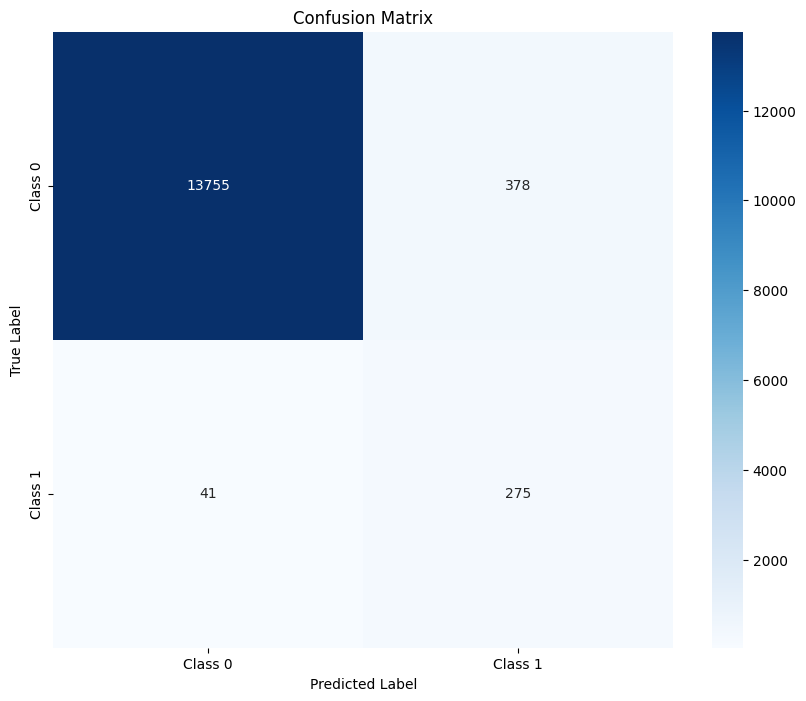

Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      0.97      0.98     14133
     Class 1       0.42      0.87      0.57       316

    accuracy                           0.97     14449
   macro avg       0.71      0.92      0.78     14449
weighted avg       0.98      0.97      0.98     14449

Binary Precision: 0.4211
Binary Recall: 0.8703
Binary F1 Score: 0.5676


In [46]:
metrics = evaluate_model(model, X_test_windows, y_test_windows_encoded)
